# Separate runs by HKLE due to size limits

# Positions rounded to 10,000

In [1]:
gpmpdata="focused.10000.T.csv.gz"

In [2]:
hkle='SVA_A'

['HERVK113', 'SVA_A', 'SVA_B', 'SVA_C', 'SVA_D', 'SVA_E', 'SVA_F']

Number of insertions detected needed to call insertion present

In [3]:
#threshold=3

In [4]:
import numpy as np
np.__version__

'1.20.3'

In [5]:
import pandas as pd
pd.__version__

'1.2.4'

In [6]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [9]:
import scipy
scipy.__version__

'1.6.3'

In [10]:
from scipy import stats

In [11]:
import seaborn as sns
sns.__version__

'0.11.1'

In [12]:
from datetime import datetime

In [13]:
import sklearn
sklearn.__version__

'0.24.2'

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
default_max_columns=pd.get_option('display.max_columns')

In [16]:
default_max_rows=pd.get_option('display.max_rows')

In [17]:
default_precision=pd.get_option('display.precision')

In [18]:
pd.set_option('display.precision', 2)

In [19]:
#default_threshold=np.get_printoptions()['threshold']

In [20]:
#np.set_printoptions(threshold=10000000)

# Read raw TCGA data and cleanup

In [21]:
gpmp_df=pd.read_csv(gpmpdata,header=[0,1],index_col=[0,1,2,3])
gpmp_df.head()

chromosome                             chr1                                  \
position                            1400000 1410000 1580000 3750000 5570000   
sample         pup    hkle     mapq                                           
SF12149_S1L0_E paired HERVK113 Q20       11      10      11       0       0   
                      SVA_A    Q20        0       0       0       0       0   
                      SVA_B    Q20        0       0       2       0       0   
                      SVA_C    Q20        0       0       0       0       0   
                      SVA_D    Q20        0       0       0       0       0   

chromosome                                                                   \
position                            5590000 6300000 6710000 7570000 7600000   
sample         pup    hkle     mapq                                           
SF12149_S1L0_E paired HERVK113 Q20        0       3       0       0       0   
                      SVA_A    Q20        0       5      18       0      17   
                      SVA_B    Q20        0       2      14       0       8   
                      SVA_C    Q20        0       4      16       0      12   
                      SVA_D    Q20        0       4      16       0      13   

chromosome                           ...     chrY                             \
position                             ... 12460000 12870000 13100000 15770000   
sample         pup    hkle     mapq  ...                                       
SF12149_S1L0_E paired HERVK113 Q20   ...        1        1        3        2   
                      SVA_A    Q20   ...        0        6        0        0   
                      SVA_B    Q20   ...        0        2        0        0   
                      SVA_C    Q20   ...        0        3        0        0   
                      SVA_D    Q20   ...        0        4        0        0   

chromosome                                                               \
position                            19530000 19690000 19700000 20550000   
sample         pup    hkle     mapq                                       
SF12149_S1L0_E paired HERVK113 Q20         0        1       10        0   
                      SVA_A    Q20         0        0        0        4   
                      SVA_B    Q20         0        0        0        6   
                      SVA_C    Q20         0        0        0        4   
                      SVA_D    Q20         0        0        0        4   

chromosome                                             
position                            20970000 21210000  
sample         pup    hkle     mapq                    
SF12149_S1L0_E paired HERVK113 Q20         0        0  
                      SVA_A    Q20         0        0  
                      SVA_B    Q20         0        0  
                      SVA_C    Q20         0        0  
                      SVA_D    Q20         0        0  

[5 rows x 4940 columns]

In [22]:
gpmp_df.reset_index(inplace=True)
gpmp_df.head()

chromosome          sample     pup      hkle mapq    chr1                  \
position                                          1400000 1410000 1580000   
0           SF12149_S1L0_E  paired  HERVK113  Q20      11      10      11   
1           SF12149_S1L0_E  paired     SVA_A  Q20       0       0       0   
2           SF12149_S1L0_E  paired     SVA_B  Q20       0       0       2   
3           SF12149_S1L0_E  paired     SVA_C  Q20       0       0       0   
4           SF12149_S1L0_E  paired     SVA_D  Q20       0       0       0   

chromosome                          ...     chrY                             \
position   3750000 5570000 5590000  ... 12460000 12870000 13100000 15770000   
0                0       0       0  ...        1        1        3        2   
1                0       0       0  ...        0        6        0        0   
2                0       0       0  ...        0        2        0        0   
3                0       0       0  ...        0        3        0        0   
4                0       0       0  ...        0        4        0        0   

chromosome                                                        
position   19530000 19690000 19700000 20550000 20970000 21210000  
0                 0        1       10        0        0        0  
1                 0        0        0        4        0        0  
2                 0        0        0        6        0        0  
3                 0        0        0        4        0        0  
4                 0        0        0        4        0        0  

[5 rows x 4944 columns]

In [23]:
gpmp_df['subject']=gpmp_df['sample'].str[0:7]
gpmp_df['subject']

0      SF12149
1      SF12149
2      SF12149
3      SF12149
4      SF12149
        ...   
443    SF12656
444    SF12656
445    SF12656
446    SF12656
447    SF12656
Name: subject, Length: 448, dtype: object

In [24]:
gpmp_df.columns

MultiIndex([( 'sample',         ''),
            (    'pup',         ''),
            (   'hkle',         ''),
            (   'mapq',         ''),
            (   'chr1',  '1400000'),
            (   'chr1',  '1410000'),
            (   'chr1',  '1580000'),
            (   'chr1',  '3750000'),
            (   'chr1',  '5570000'),
            (   'chr1',  '5590000'),
            ...
            (   'chrY', '12870000'),
            (   'chrY', '13100000'),
            (   'chrY', '15770000'),
            (   'chrY', '19530000'),
            (   'chrY', '19690000'),
            (   'chrY', '19700000'),
            (   'chrY', '20550000'),
            (   'chrY', '20970000'),
            (   'chrY', '21210000'),
            ('subject',         '')],
           names=['chromosome', 'position'], length=4945)

In [25]:
gpmp_df=gpmp_df[gpmp_df['hkle']==hkle]
gpmp_df.head()

chromosome           sample     pup   hkle mapq    chr1                  \
position                                        1400000 1410000 1580000   
1            SF12149_S1L0_E  paired  SVA_A  Q20       0       0       0   
8            SF12149_S1L1_N  paired  SVA_A  Q20       0       0       0   
15          SF12149_S2L0_NE  paired  SVA_A  Q20       0       0       0   
22           SF12210_S2L1_N  paired  SVA_A  Q20       0       0       0   
29           SF12210_S3L1_E  paired  SVA_A  Q20       0       1       0   

chromosome                          ...     chrY                             \
position   3750000 5570000 5590000  ... 12870000 13100000 15770000 19530000   
1                0       0       0  ...        6        0        0        0   
8                0       0       0  ...        4        0        0        3   
15               0       0       0  ...       12        0        0        1   
22               0       0       0  ...        0        0        0        0   
29               0       0       0  ...        0        0        0        0   

chromosome                                               subject  
position   19690000 19700000 20550000 20970000 21210000           
1                 0        0        4        0        0  SF12149  
8                 0        0        1        0        0  SF12149  
15                0        0        0        0        0  SF12149  
22                0        0        0        0        0  SF12210  
29                0        0        0        0        0  SF12210  

[5 rows x 4945 columns]

In [26]:
gpmp_df.set_index(['subject','sample','pup','hkle','mapq'],inplace=True)
gpmp_df.head()

chromosome                                   chr1                          \
position                                  1400000 1410000 1580000 3750000   
subject sample          pup    hkle  mapq                                   
SF12149 SF12149_S1L0_E  paired SVA_A Q20        0       0       0       0   
        SF12149_S1L1_N  paired SVA_A Q20        0       0       0       0   
        SF12149_S2L0_NE paired SVA_A Q20        0       0       0       0   
SF12210 SF12210_S2L1_N  paired SVA_A Q20        0       0       0       0   
        SF12210_S3L1_E  paired SVA_A Q20        0       1       0       0   

chromosome                                                                 \
position                                  5570000 5590000 6300000 6710000   
subject sample          pup    hkle  mapq                                   
SF12149 SF12149_S1L0_E  paired SVA_A Q20        0       0       5      18   
        SF12149_S1L1_N  paired SVA_A Q20        0       0       6       7   
        SF12149_S2L0_NE paired SVA_A Q20        0       0      12      15   
SF12210 SF12210_S2L1_N  paired SVA_A Q20        0       0       8       4   
        SF12210_S3L1_E  paired SVA_A Q20        0       0      16      16   

chromosome                                                 ...     chrY  \
position                                  7570000 7600000  ... 12460000   
subject sample          pup    hkle  mapq                  ...            
SF12149 SF12149_S1L0_E  paired SVA_A Q20        0      17  ...        0   
        SF12149_S1L1_N  paired SVA_A Q20        0       2  ...        0   
        SF12149_S2L0_NE paired SVA_A Q20        0      14  ...        0   
SF12210 SF12210_S2L1_N  paired SVA_A Q20        0       2  ...        0   
        SF12210_S3L1_E  paired SVA_A Q20        0       7  ...        0   

chromosome                                                                     \
position                                  12870000 13100000 15770000 19530000   
subject sample          pup    hkle  mapq                                       
SF12149 SF12149_S1L0_E  paired SVA_A Q20         6        0        0        0   
        SF12149_S1L1_N  paired SVA_A Q20         4        0        0        3   
        SF12149_S2L0_NE paired SVA_A Q20        12        0        0        1   
SF12210 SF12210_S2L1_N  paired SVA_A Q20         0        0        0        0   
        SF12210_S3L1_E  paired SVA_A Q20         0        0        0        0   

chromosome                                                                     \
position                                  19690000 19700000 20550000 20970000   
subject sample          pup    hkle  mapq                                       
SF12149 SF12149_S1L0_E  paired SVA_A Q20         0        0        4        0   
        SF12149_S1L1_N  paired SVA_A Q20         0        0        1        0   
        SF12149_S2L0_NE paired SVA_A Q20         0        0        0        0   
SF12210 SF12210_S2L1_N  paired SVA_A Q20         0        0        0        0   
        SF12210_S3L1_E  paired SVA_A Q20         0        0        0        0   

chromosome                                          
position                                  21210000  
subject sample          pup    hkle  mapq           
SF12149 SF12149_S1L0_E  paired SVA_A Q20         0  
        SF12149_S1L1_N  paired SVA_A Q20         0  
        SF12149_S2L0_NE paired SVA_A Q20         0  
SF12210 SF12210_S2L1_N  paired SVA_A Q20         0  
        SF12210_S3L1_E  paired SVA_A Q20         0  

[5 rows x 4940 columns]

In [27]:
gpmp_df.shape

(64, 4940)

## Remove "hkle", "pup" and "q" as they are useless in this dataset.

In [28]:
gpmp_df=gpmp_df.droplevel('pup',axis='index').droplevel('mapq',axis='index').droplevel('hkle',axis='index')

In [29]:
gpmp_df.head()

chromosome                 chr1                                          \
position                1400000 1410000 1580000 3750000 5570000 5590000   
subject sample                                                            
SF12149 SF12149_S1L0_E        0       0       0       0       0       0   
        SF12149_S1L1_N        0       0       0       0       0       0   
        SF12149_S2L0_NE       0       0       0       0       0       0   
SF12210 SF12210_S2L1_N        0       0       0       0       0       0   
        SF12210_S3L1_E        0       1       0       0       0       0   

chromosome                                               ...     chrY  \
position                6300000 6710000 7570000 7600000  ... 12460000   
subject sample                                           ...            
SF12149 SF12149_S1L0_E        5      18       0      17  ...        0   
        SF12149_S1L1_N        6       7       0       2  ...        0   
        SF12149_S2L0_NE      12      15       0      14  ...        0   
SF12210 SF12210_S2L1_N        8       4       0       2  ...        0   
        SF12210_S3L1_E       16      16       0       7  ...        0   

chromosome                                                                     \
position                12870000 13100000 15770000 19530000 19690000 19700000   
subject sample                                                                  
SF12149 SF12149_S1L0_E         6        0        0        0        0        0   
        SF12149_S1L1_N         4        0        0        3        0        0   
        SF12149_S2L0_NE       12        0        0        1        0        0   
SF12210 SF12210_S2L1_N         0        0        0        0        0        0   
        SF12210_S3L1_E         0        0        0        0        0        0   

chromosome                                          
position                20550000 20970000 21210000  
subject sample                                      
SF12149 SF12149_S1L0_E         4        0        0  
        SF12149_S1L1_N         1        0        0  
        SF12149_S2L0_NE        0        0        0  
SF12210 SF12210_S2L1_N         0        0        0  
        SF12210_S3L1_E         0        0        0  

[5 rows x 4940 columns]

In [30]:
gpmp_df.shape

(64, 4940)

In [31]:
gpmp_df.columns= [' '.join(col).strip() for col in gpmp_df.columns.values]
gpmp_df

chr1 1400000  chr1 1410000  chr1 1580000  \
subject sample                                                       
SF12149 SF12149_S1L0_E               0             0             0   
        SF12149_S1L1_N               0             0             0   
        SF12149_S2L0_NE              0             0             0   
SF12210 SF12210_S2L1_N               0             0             0   
        SF12210_S3L1_E               0             1             0   
...                                ...           ...           ...   
SF12634 SF12634_S10L4_N              0             0             0   
        SF12634_S13L4_E              0             0             0   
        SF12634_S14L4_NE             0             0             0   
SF12656 SF12656_S11L4_N              0             0             0   
        SF12656_S1L1_E               0             0             0   

                          chr1 3750000  chr1 5570000  chr1 5590000  \
subject sample                                                       
SF12149 SF12149_S1L0_E               0             0             0   
        SF12149_S1L1_N               0             0             0   
        SF12149_S2L0_NE              0             0             0   
SF12210 SF12210_S2L1_N               0             0             0   
        SF12210_S3L1_E               0             0             0   
...                                ...           ...           ...   
SF12634 SF12634_S10L4_N              0             0             0   
        SF12634_S13L4_E              0             0             0   
        SF12634_S14L4_NE             0             0             0   
SF12656 SF12656_S11L4_N              0             0             0   
        SF12656_S1L1_E               0             0             0   

                          chr1 6300000  chr1 6710000  chr1 7570000  \
subject sample                                                       
SF12149 SF12149_S1L0_E               5            18             0   
        SF12149_S1L1_N               6             7             0   
        SF12149_S2L0_NE             12            15             0   
SF12210 SF12210_S2L1_N               8             4             0   
        SF12210_S3L1_E              16            16             0   
...                                ...           ...           ...   
SF12634 SF12634_S10L4_N             17             8             0   
        SF12634_S13L4_E              8             4             0   
        SF12634_S14L4_NE             6             4             0   
SF12656 SF12656_S11L4_N              6             6             0   
        SF12656_S1L1_E              10             6             0   

                          chr1 7600000  ...  chrY 12460000  chrY 12870000  \
subject sample                          ...                                 
SF12149 SF12149_S1L0_E              17  ...              0              6   
        SF12149_S1L1_N               2  ...              0              4   
        SF12149_S2L0_NE             14  ...              0             12   
SF12210 SF12210_S2L1_N               2  ...              0              0   
        SF12210_S3L1_E               7  ...              0              0   
...                                ...  ...            ...            ...   
SF12634 SF12634_S10L4_N              8  ...              0              3   
        SF12634_S13L4_E              8  ...              0              5   
        SF12634_S14L4_NE             5  ...              0              3   
SF12656 SF12656_S11L4_N              8  ...              0              0   
        SF12656_S1L1_E              10  ...              0              0   

                          chrY 13100000  chrY 15770000  chrY 19530000  \
subject sample                                                          
SF12149 SF12149_S1L0_E                0              0              0   
        SF12149_S1L1_N                0              0              3   

In [32]:
gpmp_df.reset_index(inplace=True)
gpmp_df['type']=gpmp_df['sample'].str.split('_',expand=True)[2]

In [33]:
gpmp_df['type'].head()

0     E
1     N
2    NE
3     N
4     E
Name: type, dtype: object

In [34]:
gpmp_df.head()

,subject,sample,chr1 1400000,chr1 1410000,chr1 1580000,chr1 3750000,chr1 5570000,chr1 5590000,chr1 6300000,chr1 6710000,...,chrY 12870000,chrY 13100000,chrY 15770000,chrY 19530000,chrY 19690000,chrY 19700000,chrY 20550000,chrY 20970000,chrY 21210000,type
0,SF12149,SF12149_S1L0_E,0,0,0,0,0,0,5,18,...,6,0,0,0,0,0,4,0,0,E
1,SF12149,SF12149_S1L1_N,0,0,0,0,0,0,6,7,...,4,0,0,3,0,0,1,0,0,N
2,SF12149,SF12149_S2L0_NE,0,0,0,0,0,0,12,15,...,12,0,0,1,0,0,0,0,0,NE
3,SF12210,SF12210_S2L1_N,0,0,0,0,0,0,8,4,...,0,0,0,0,0,0,0,0,0,N
4,SF12210,SF12210_S3L1_E,0,1,0,0,0,0,16,16,...,0,0,0,0,0,0,0,0,0,E


# NORMALIZE INSERTION POINTS BY ( * 1,000,000,000 / READ COUNT )

In [35]:
gpmp_counts=pd.read_csv("raw_read_counts.csv")
gpmp_counts.head()

,sample,raw pair count
0,SF12149_S1L0_E,1515318278
1,SF12149_S1L1_N,660620929
2,SF12149_S2L0_NE,1334986480
3,SF12210_S2L1_N,597544666
4,SF12210_S3L1_E,1487133148


In [36]:
gpmp_df.reset_index(drop=True,inplace=True)
gpmp_df

,subject,sample,chr1 1400000,chr1 1410000,chr1 1580000,chr1 3750000,chr1 5570000,chr1 5590000,chr1 6300000,chr1 6710000,...,chrY 12870000,chrY 13100000,chrY 15770000,chrY 19530000,chrY 19690000,chrY 19700000,chrY 20550000,chrY 20970000,chrY 21210000,type
0,SF12149,SF12149_S1L0_E,0,0,0,0,0,0,5,18,...,6,0,0,0,0,0,4,0,0,E
1,SF12149,SF12149_S1L1_N,0,0,0,0,0,0,6,7,...,4,0,0,3,0,0,1,0,0,N
2,SF12149,SF12149_S2L0_NE,0,0,0,0,0,0,12,15,...,12,0,0,1,0,0,0,0,0,NE
3,SF12210,SF12210_S2L1_N,0,0,0,0,0,0,8,4,...,0,0,0,0,0,0,0,0,0,N
4,SF12210,SF12210_S3L1_E,0,1,0,0,0,0,16,16,...,0,0,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,SF12634,SF12634_S10L4_N,0,0,0,0,0,0,17,8,...,3,0,0,4,0,0,3,0,0,N
60,SF12634,SF12634_S13L4_E,0,0,0,0,0,0,8,4,...,5,0,0,2,0,0,1,0,0,E
61,SF12634,SF12634_S14L4_NE,0,0,0,0,0,0,6,4,...,3,0,0,3,0,0,2,0,0,NE
62,SF12656,SF12656_S11L4_N,0,0,0,0,0,0,6,6,...,0,0,0,0,0,0,0,0,0,N


In [37]:
gpmp_df=gpmp_df.merge(gpmp_counts,on='sample')
#gpmp_df.set_index(['subject','sample'],inplace=True)
gpmp_df

,subject,sample,chr1 1400000,chr1 1410000,chr1 1580000,chr1 3750000,chr1 5570000,chr1 5590000,chr1 6300000,chr1 6710000,...,chrY 13100000,chrY 15770000,chrY 19530000,chrY 19690000,chrY 19700000,chrY 20550000,chrY 20970000,chrY 21210000,type,raw pair count
0,SF12149,SF12149_S1L0_E,0,0,0,0,0,0,5,18,...,0,0,0,0,0,4,0,0,E,1515318278
1,SF12149,SF12149_S1L1_N,0,0,0,0,0,0,6,7,...,0,0,3,0,0,1,0,0,N,660620929
2,SF12149,SF12149_S2L0_NE,0,0,0,0,0,0,12,15,...,0,0,1,0,0,0,0,0,NE,1334986480
3,SF12210,SF12210_S2L1_N,0,0,0,0,0,0,8,4,...,0,0,0,0,0,0,0,0,N,597544666
4,SF12210,SF12210_S3L1_E,0,1,0,0,0,0,16,16,...,0,0,0,0,0,0,0,0,E,1487133148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,SF12634,SF12634_S10L4_N,0,0,0,0,0,0,17,8,...,0,0,4,0,0,3,0,0,N,1403120096
60,SF12634,SF12634_S13L4_E,0,0,0,0,0,0,8,4,...,0,0,2,0,0,1,0,0,E,1528226977
61,SF12634,SF12634_S14L4_NE,0,0,0,0,0,0,6,4,...,0,0,3,0,0,2,0,0,NE,1075444460
62,SF12656,SF12656_S11L4_N,0,0,0,0,0,0,6,6,...,0,0,0,0,0,0,0,0,N,1320466667


# Sums up like samples

## Subjects only have 1 normal but usually 4 tumors

In [38]:
sums=pd.DataFrame(data=None, columns=gpmp_df.columns)
sums

,subject,sample,chr1 1400000,chr1 1410000,chr1 1580000,chr1 3750000,chr1 5570000,chr1 5590000,chr1 6300000,chr1 6710000,...,chrY 13100000,chrY 15770000,chrY 19530000,chrY 19690000,chrY 19700000,chrY 20550000,chrY 20970000,chrY 21210000,type,raw pair count


In [39]:
gpmp_df['subject'].unique()

array(['SF12149', 'SF12210', 'SF12255', 'SF12271', 'SF12288', 'SF12333',
       'SF12407', 'SF12430', 'SF12460', 'SF12480', 'SF12495', 'SF12577',
       'SF12634', 'SF12656'], dtype=object)

In [40]:
for subject in gpmp_df['subject'].unique():
    print(subject)
    for type in ['NE','E']:
        print(type)
        if len(gpmp_df[(gpmp_df['subject']==subject)&( gpmp_df['type']==type)]) > 1:
            tmp=pd.DataFrame(gpmp_df[(gpmp_df['subject']==subject)&( gpmp_df['type']==type)].sum()).T
            tmp['subject']=subject
            tmp['type']=type
            sums=sums.append(tmp)
            gpmp_df.drop(gpmp_df[(gpmp_df['subject']==subject)&( gpmp_df['type']==type)].index,inplace=True)


SF12149
NE
E
SF12210
NE
E
SF12255
NE
E
SF12271
NE
E
SF12288
NE
E
SF12333
NE
E
SF12407
NE
E
SF12430
NE
E
SF12460
NE
E
SF12480
NE
E
SF12495
NE
E
SF12577
NE
E
SF12634
NE
E
SF12656
NE
E


In [41]:
gpmp_df

,subject,sample,chr1 1400000,chr1 1410000,chr1 1580000,chr1 3750000,chr1 5570000,chr1 5590000,chr1 6300000,chr1 6710000,...,chrY 13100000,chrY 15770000,chrY 19530000,chrY 19690000,chrY 19700000,chrY 20550000,chrY 20970000,chrY 21210000,type,raw pair count
0,SF12149,SF12149_S1L0_E,0,0,0,0,0,0,5,18,...,0,0,0,0,0,4,0,0,E,1515318278
1,SF12149,SF12149_S1L1_N,0,0,0,0,0,0,6,7,...,0,0,3,0,0,1,0,0,N,660620929
2,SF12149,SF12149_S2L0_NE,0,0,0,0,0,0,12,15,...,0,0,1,0,0,0,0,0,NE,1334986480
3,SF12210,SF12210_S2L1_N,0,0,0,0,0,0,8,4,...,0,0,0,0,0,0,0,0,N,597544666
4,SF12210,SF12210_S3L1_E,0,1,0,0,0,0,16,16,...,0,0,0,0,0,0,0,0,E,1487133148
5,SF12210,SF12210_S4L1_NE,0,0,0,0,0,0,20,14,...,0,0,0,0,0,0,0,0,NE,1377641046
6,SF12255,SF12255_S5L1_E,0,0,0,0,0,0,9,10,...,0,0,1,0,0,1,0,0,E,1422097108
7,SF12255,SF12255_S6L1_NE,0,0,0,0,0,0,15,5,...,0,0,1,0,0,0,0,0,NE,1341644793
8,SF12255,SF12255_S7L2_N,0,0,0,0,0,0,4,5,...,0,0,0,0,0,2,0,0,N,688035696
9,SF12271,SF12271_S7L1_E,0,0,0,0,0,0,19,16,...,0,0,3,0,0,6,0,0,E,1477360307


In [42]:
sums

,subject,sample,chr1 1400000,chr1 1410000,chr1 1580000,chr1 3750000,chr1 5570000,chr1 5590000,chr1 6300000,chr1 6710000,...,chrY 13100000,chrY 15770000,chrY 19530000,chrY 19690000,chrY 19700000,chrY 20550000,chrY 20970000,chrY 21210000,type,raw pair count
0,SF12288,SF12288_S2L1_NESF12288_S2L2_NESF12288_S2L3_NES...,0,0,0,0,0,0,18,26,...,0,0,1,0,0,2,0,0,NE,1512280616
0,SF12288,SF12288_S1L1_ESF12288_S1L2_ESF12288_S1L3_ESF12...,0,0,0,0,0,0,12,9,...,0,0,2,0,0,6,0,0,E,1394567427
0,SF12333,SF12333_S4L1_NESF12333_S4L2_NESF12333_S4L3_NES...,0,1,0,0,0,0,12,26,...,0,0,0,0,0,0,0,0,NE,1605351572
0,SF12333,SF12333_S3L1_ESF12333_S3L2_ESF12333_S3L3_ESF12...,0,0,0,0,0,0,18,13,...,0,0,0,0,0,0,0,0,E,1425231172
0,SF12407,SF12407_S6L1_NESF12407_S6L2_NESF12407_S6L3_NES...,0,0,0,0,0,0,15,18,...,0,0,0,0,0,0,0,0,NE,1531845212
0,SF12407,SF12407_S5L1_ESF12407_S5L2_ESF12407_S5L3_ESF12...,0,0,0,0,0,0,11,35,...,0,0,0,0,0,0,0,0,E,1636784693
0,SF12430,SF12430_S8L1_NESF12430_S8L2_NESF12430_S8L3_NES...,0,0,0,0,0,0,17,25,...,0,0,0,0,0,0,0,0,NE,1613935035
0,SF12430,SF12430_S7L1_ESF12430_S7L2_ESF12430_S7L3_ESF12...,0,0,0,0,0,0,14,21,...,0,0,0,0,0,0,0,0,E,1762174970


In [43]:
gpmp_df=gpmp_df.append(sums)

In [44]:
gpmp_df.drop('sample',axis='columns',inplace=True)

In [45]:
gpmp_df[gpmp_df.columns[gpmp_df.columns.str.contains("^chr")]]=(
    1e9*gpmp_df[gpmp_df.columns[gpmp_df.columns.str.contains("^chr")]].values)/gpmp_df[['raw pair count']].values


In [46]:
gpmp_df.drop('raw pair count',axis='columns',inplace=True)
gpmp_df

,subject,chr1 1400000,chr1 1410000,chr1 1580000,chr1 3750000,chr1 5570000,chr1 5590000,chr1 6300000,chr1 6710000,chr1 7570000,...,chrY 12870000,chrY 13100000,chrY 15770000,chrY 19530000,chrY 19690000,chrY 19700000,chrY 20550000,chrY 20970000,chrY 21210000,type
0,SF12149,0.0,0.0,0.0,0.0,0.0,0.0,3.3,11.88,0.0,...,3.96,0.0,0.0,0.0,0.0,0.0,2.64,0.0,0.0,E
1,SF12149,0.0,0.0,0.0,0.0,0.0,0.0,9.08,10.6,0.0,...,6.05,0.0,0.0,4.54,0.0,0.0,1.51,0.0,0.0,N
2,SF12149,0.0,0.0,0.0,0.0,0.0,0.0,8.99,11.24,0.0,...,8.99,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0,NE
3,SF12210,0.0,0.0,0.0,0.0,0.0,0.0,13.39,6.69,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,SF12210,0.0,0.67,0.0,0.0,0.0,0.0,10.76,10.76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E
5,SF12210,0.0,0.0,0.0,0.0,0.0,0.0,14.52,10.16,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NE
6,SF12255,0.0,0.0,0.0,0.0,0.0,0.0,6.33,7.03,0.0,...,4.22,0.0,0.0,0.7,0.0,0.0,0.7,0.0,0.0,E
7,SF12255,0.0,0.0,0.0,0.0,0.0,0.0,11.18,3.73,0.0,...,0.0,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0,NE
8,SF12255,0.0,0.0,0.0,0.0,0.0,0.0,5.81,7.27,0.0,...,5.81,0.0,0.0,0.0,0.0,0.0,2.91,0.0,0.0,N
9,SF12271,0.0,0.0,0.0,0.0,0.0,0.0,12.86,10.83,0.0,...,5.42,0.0,0.0,2.03,0.0,0.0,4.06,0.0,0.0,E


In [47]:
def ttests_boxplots_and_heatmaps(localdf,columns,group_column,box_p=0.05,heat_p=0.15):
    select_p_values=[]
#    localdf.reset_index(inplace=True)
    groups=localdf[group_column].unique().tolist()
    print("T-Testing")
    for col in columns:
        if ( col not in localdf.columns ):
            continue
        for group in groups:
            others = groups.copy()
            others.remove(group)
            for other in others:
                t,p = stats.ttest_ind(
#                t,p = stats.ttest_rel(
                    localdf[localdf[group_column]==group][col],
                    localdf[localdf[group_column]==other][col])
                #if(p<0.1):
                #    print(col,group,other,t,p)
                if(( p > 0 ) and ( p < heat_p )):
                    select_p_values.append([abs(t),p,col])

    pdf = pd.DataFrame(select_p_values, columns=['t','p','col'])                        
    pdf=pdf.drop_duplicates().sort_values('p')
    print("Boxplotting")
    for index, row in pdf.iterrows():
        if(( row['p'] > 0 ) and ( row['p'] < box_p )):
            print(" p : "+str(row['p'])+"  ( t : "+str(row['t'])+" ) :  "+str(row['col']))
            
            localdf.boxplot(column=row['col'],by=[group_column])
            plt.title(str(row['col']))
            plt.xticks(rotation=75,ha='right')
            plt.show()                            

    print("Clustermapping")

    selected=['subject',group_column]
#    selected=['sample',group_column]
    selected=np.append(selected,pdf['col'])
    selected=np.unique(selected)
    print(selected)
    
    #['Lab kit' 'NR_029609.1' 'trimmer' 'diag' 'idh' 'sample' 'subject']
    #['IDH_1p19q_status' 'chrY 7711000' 'subject']
    if len(selected) > 3: #7:
        tmp=localdf[selected].copy()
#        tmp.set_index(['sample',group_column],inplace=True)
        tmp.set_index(['subject',group_column],inplace=True)

        #tmp-=tmp.min() # This may almost always be 0 now.
#        tmp/=tmp.max() # given that there should be no NAs now, coule let clustermap do this
        # ...
        #standard_scale int or None, optional
        #Either 0 (rows) or 1 (columns).
        #Whether or not to standardize that dimension, meaning for each row or column,
        #subtract the minimum and divide each by its maximum.
        # how would that deal with 0s or empty cells

        tmp=tmp.fillna(0) # Somehow, some scaled values become NaN so keep this

        tmp.reset_index(inplace=True)

        tmp=tmp.sort_values([group_column])
#        tmp.set_index(['sample'],inplace=True)
        tmp.set_index(['subject'],inplace=True)

        diagnoses=tmp.pop(group_column)
        tmp=tmp.T

        network_pal = sns.cubehelix_palette(len(diagnoses.unique()),
                            light=.9, dark=.1, reverse=True,
                            start=1, rot=-2)
        #print(network_pal)
        network_pal
        #print('lut')
        network_lut = dict(zip(diagnoses.unique(), network_pal))
        #print(network_lut)
        #print('labels')
        # Convert the palette to vectors that will be drawn on the side of the matrix
        network_labels = diagnoses
        #print(network_labels)
        network_colors = pd.Series(network_labels, index=tmp.columns).map(network_lut)                
        #print('colors')
        #print(network_colors)

#        print(tmp)

        g=sns.clustermap(tmp,col_cluster=False,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 1 : " + group_column + " : select p < " + str(heat_p) )
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        #g.cax.set_position([.97, .2, .03, .45])
        g.cax.set_position([0, .15, .005, .6])
        plt.show()

        g=sns.clustermap(tmp,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 2 : " + group_column + " : select p < " + str(heat_p) )
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        # [dist from left,dist from bottom?,width?,height?]
        g.cax.set_position([0, .15, .005, .6])
        plt.show()  
        


        pcadf=localdf[selected].copy()

        #pcadf=tmp[(tmp["Lab kit"]==labkit) & (tmp["trimmer"]==trimmer) & tmp['diag'].isin(diags)].copy()
        #pcadf=pcadf.drop('trimmer',axis='columns')
        #pcadf=pcadf.drop('Lab kit',axis='columns')
#        pcadf.set_index(['sample',group_column],inplace=True)
        pcadf.set_index(['subject',group_column],inplace=True)
        elements=pcadf.columns
        pcadf.reset_index(inplace=True)
        scaler = StandardScaler()
        scaler.fit(pcadf[elements])
        scaled_data = scaler.transform(pcadf[elements])
        #scaled_data[0]
        
        #ValueError: n_components=8 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'
        n=min([len(pcadf),len(pcadf.columns)-2,8])
        pca = PCA(n_components=n)
        
        pca.fit(scaled_data)
        x_pca = pca.transform(scaled_data)
        
        # for color
        groups=pcadf[group_column].unique().tolist()
        pcadf['group_index']=pcadf[group_column].apply(lambda x: groups.index(x))
        
        fig = plt.figure(figsize = (18,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title(''+str(n)+' component PCA '+group_column + " : select p < " + str(heat_p) , fontsize = 20)

        colors = ['r','g','b','c','m','y','k']
        for target, color in zip(groups,colors):
            indicesToKeep = pcadf[group_column] == target
            ax.scatter(x_pca[indicesToKeep, 0], x_pca[indicesToKeep, 1], c = color, s = 50)
        ax.legend(groups)
        ax.grid()
        #plt.title(group_column)
        plt.show()

    else:
        print("Not enough data to produce cluster maps")
        

In [48]:
gpmp_df.reset_index(inplace=True)
gpmp_df.head()

,index,subject,chr1 1400000,chr1 1410000,chr1 1580000,chr1 3750000,chr1 5570000,chr1 5590000,chr1 6300000,chr1 6710000,...,chrY 12870000,chrY 13100000,chrY 15770000,chrY 19530000,chrY 19690000,chrY 19700000,chrY 20550000,chrY 20970000,chrY 21210000,type
0,0,SF12149,0.0,0.0,0.0,0.0,0.0,0.0,3.3,11.88,...,3.96,0.0,0.0,0.0,0.0,0.0,2.64,0.0,0.0,E
1,1,SF12149,0.0,0.0,0.0,0.0,0.0,0.0,9.08,10.6,...,6.05,0.0,0.0,4.54,0.0,0.0,1.51,0.0,0.0,N
2,2,SF12149,0.0,0.0,0.0,0.0,0.0,0.0,8.99,11.24,...,8.99,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0,NE
3,3,SF12210,0.0,0.0,0.0,0.0,0.0,0.0,13.39,6.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,4,SF12210,0.0,0.67,0.0,0.0,0.0,0.0,10.76,10.76,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E


In [49]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210614 15:18:43'

type
T-Testing
Boxplotting
 p : 4.6132314540994235e-05  ( t : 4.9589084605247296 ) :  chr5 32200000


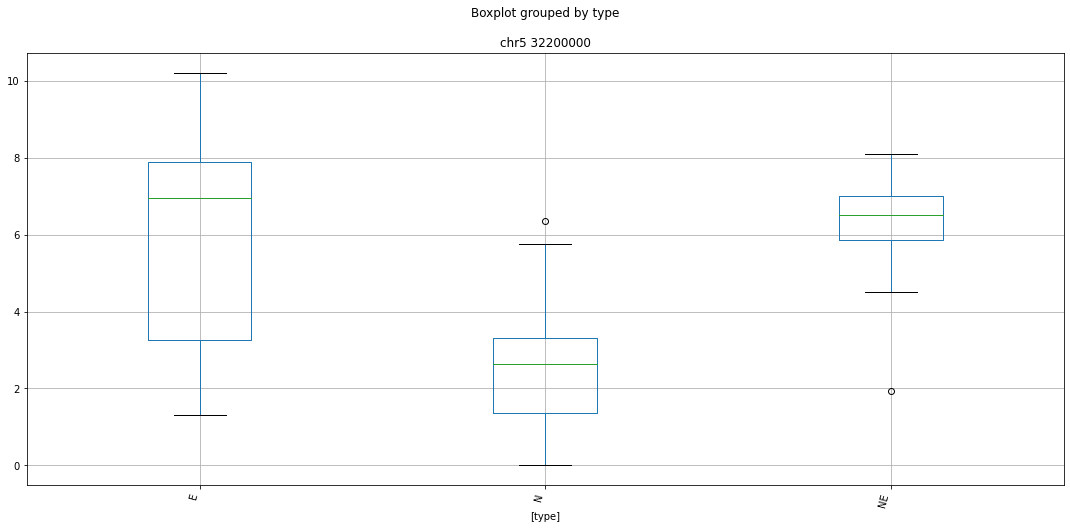

 p : 4.991347657279045e-05  ( t : 4.927850761389893 ) :  chr6 158340000


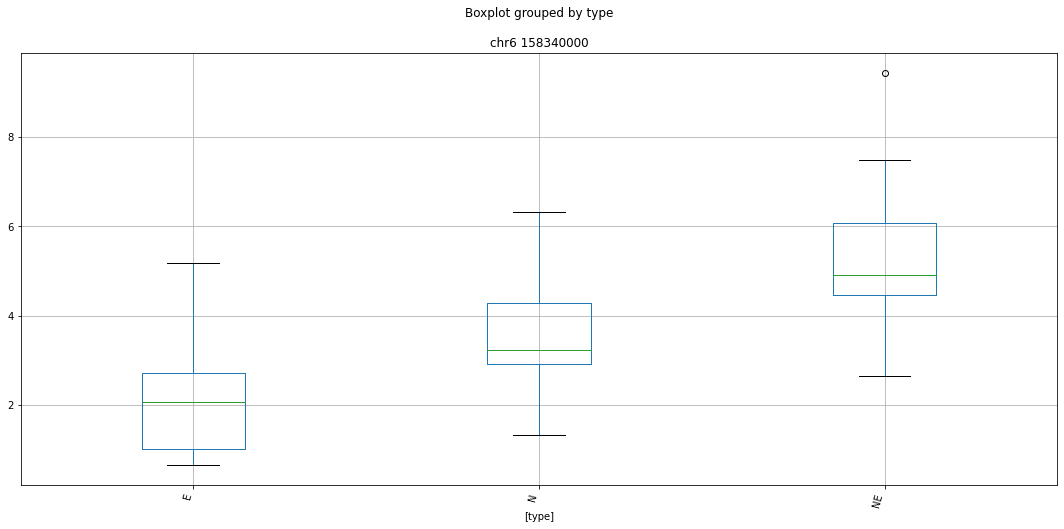

Clustermapping
['chr1 10020000' 'chr1 10420000' 'chr1 104430000' ... 'chrY 8910000'
 'subject' 'type']


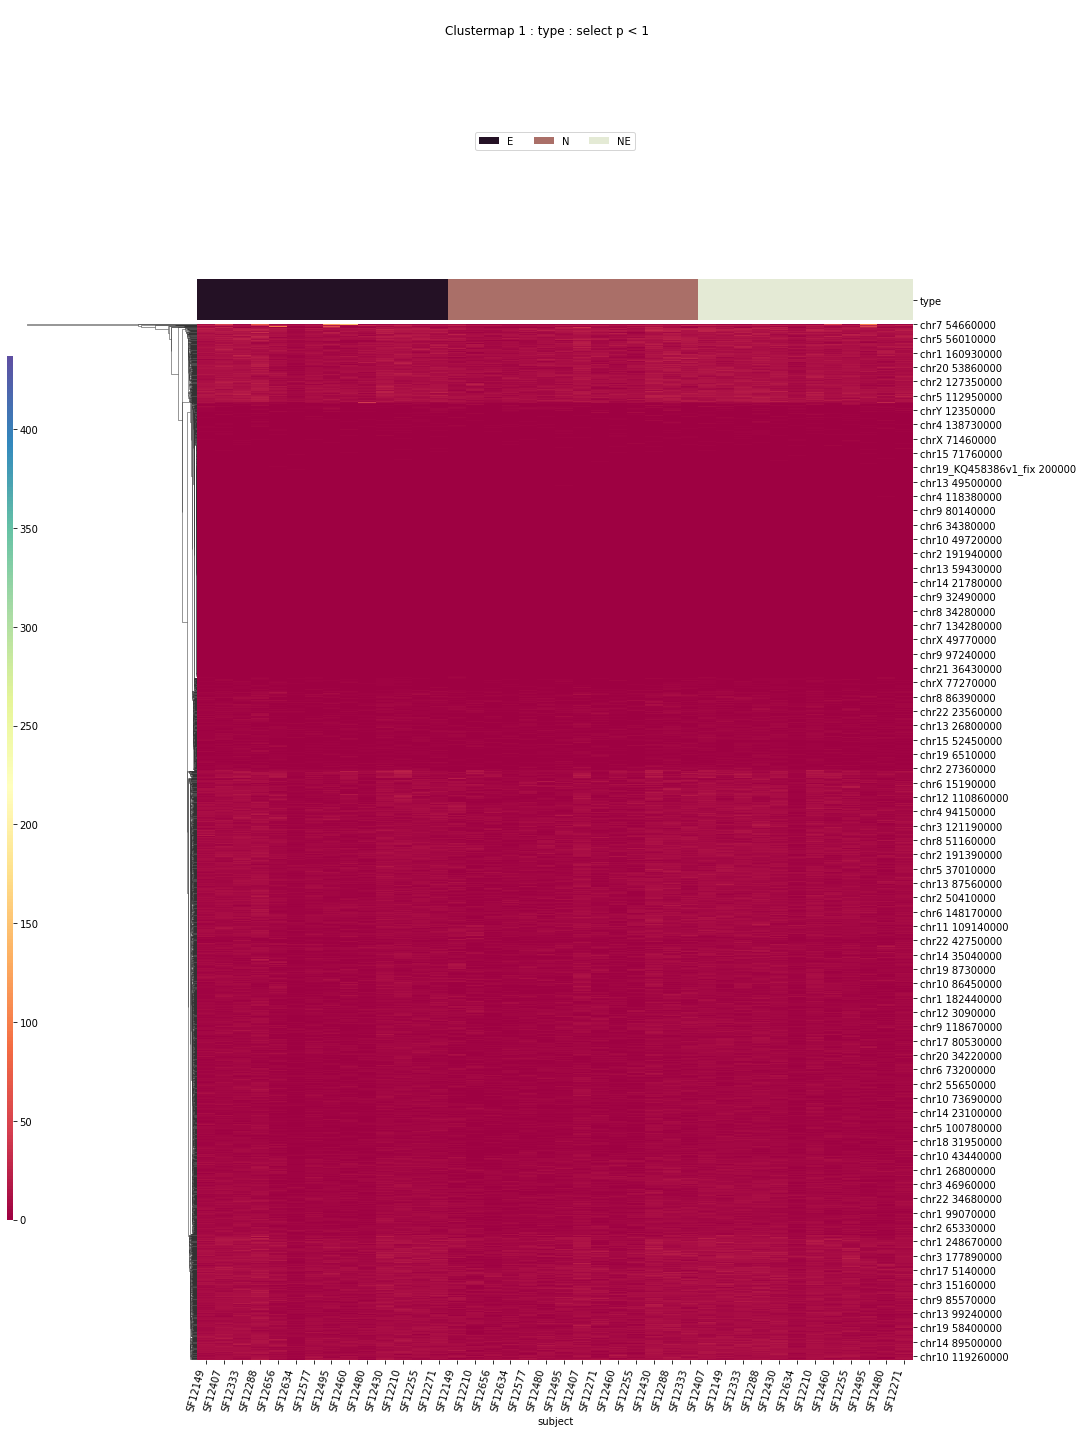

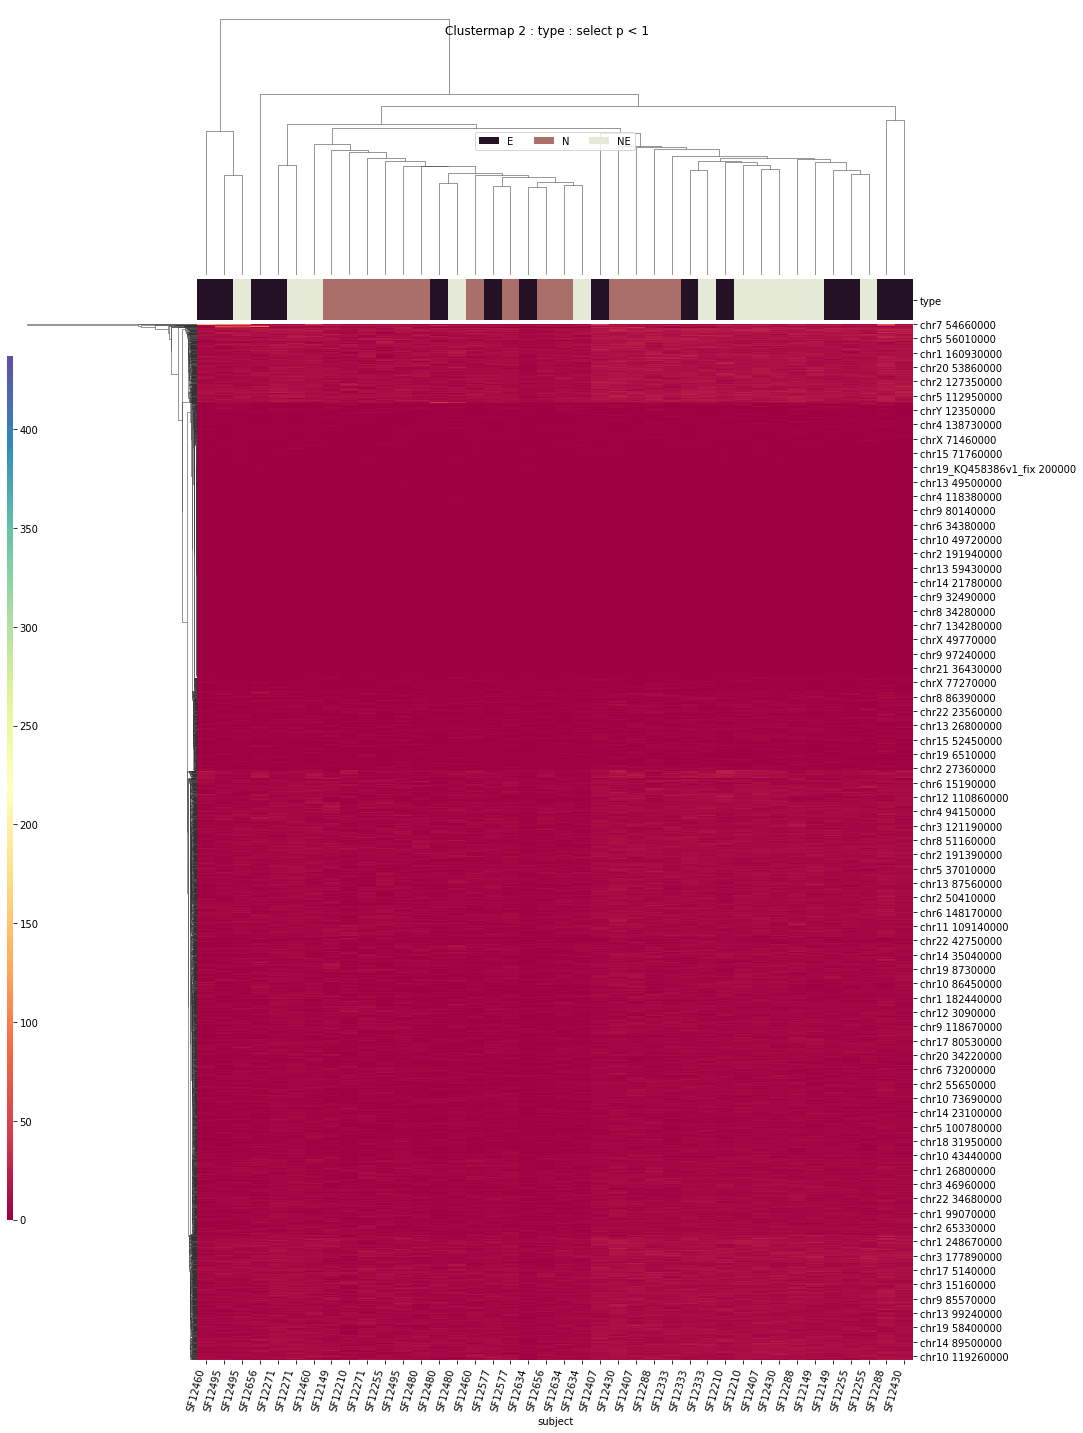

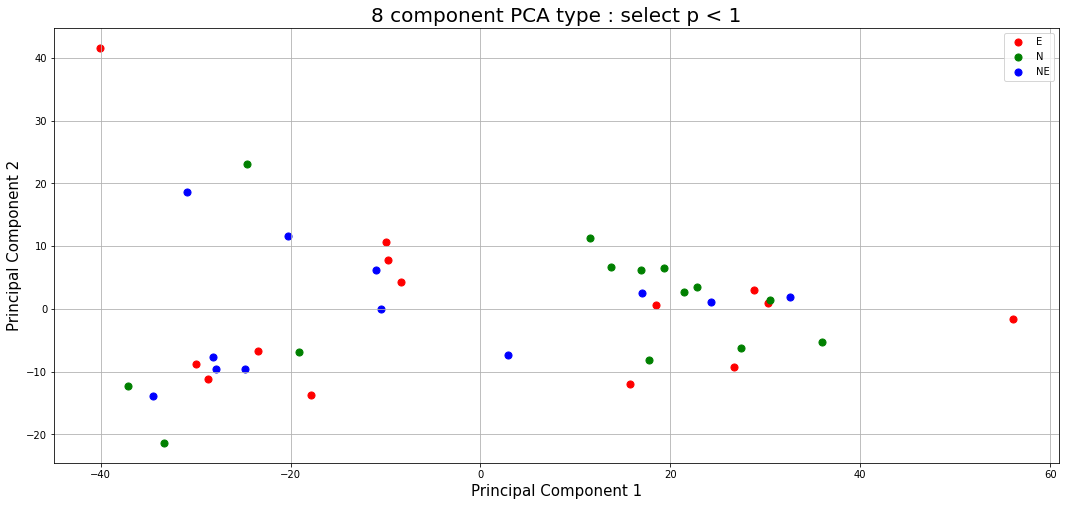

In [50]:
for column in ['type']:
    print(column)
    ttests_boxplots_and_heatmaps(gpmp_df,
        gpmp_df.columns[gpmp_df.columns.str.contains("^chr")],column,box_p=1e-4,heat_p=1)
    

In [51]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210614 15:35:49'

type
T-Testing
Boxplotting
Clustermapping
['chr1 10020000' 'chr1 10420000' 'chr1 104430000' ... 'chrY 8910000'
 'subject' 'type']


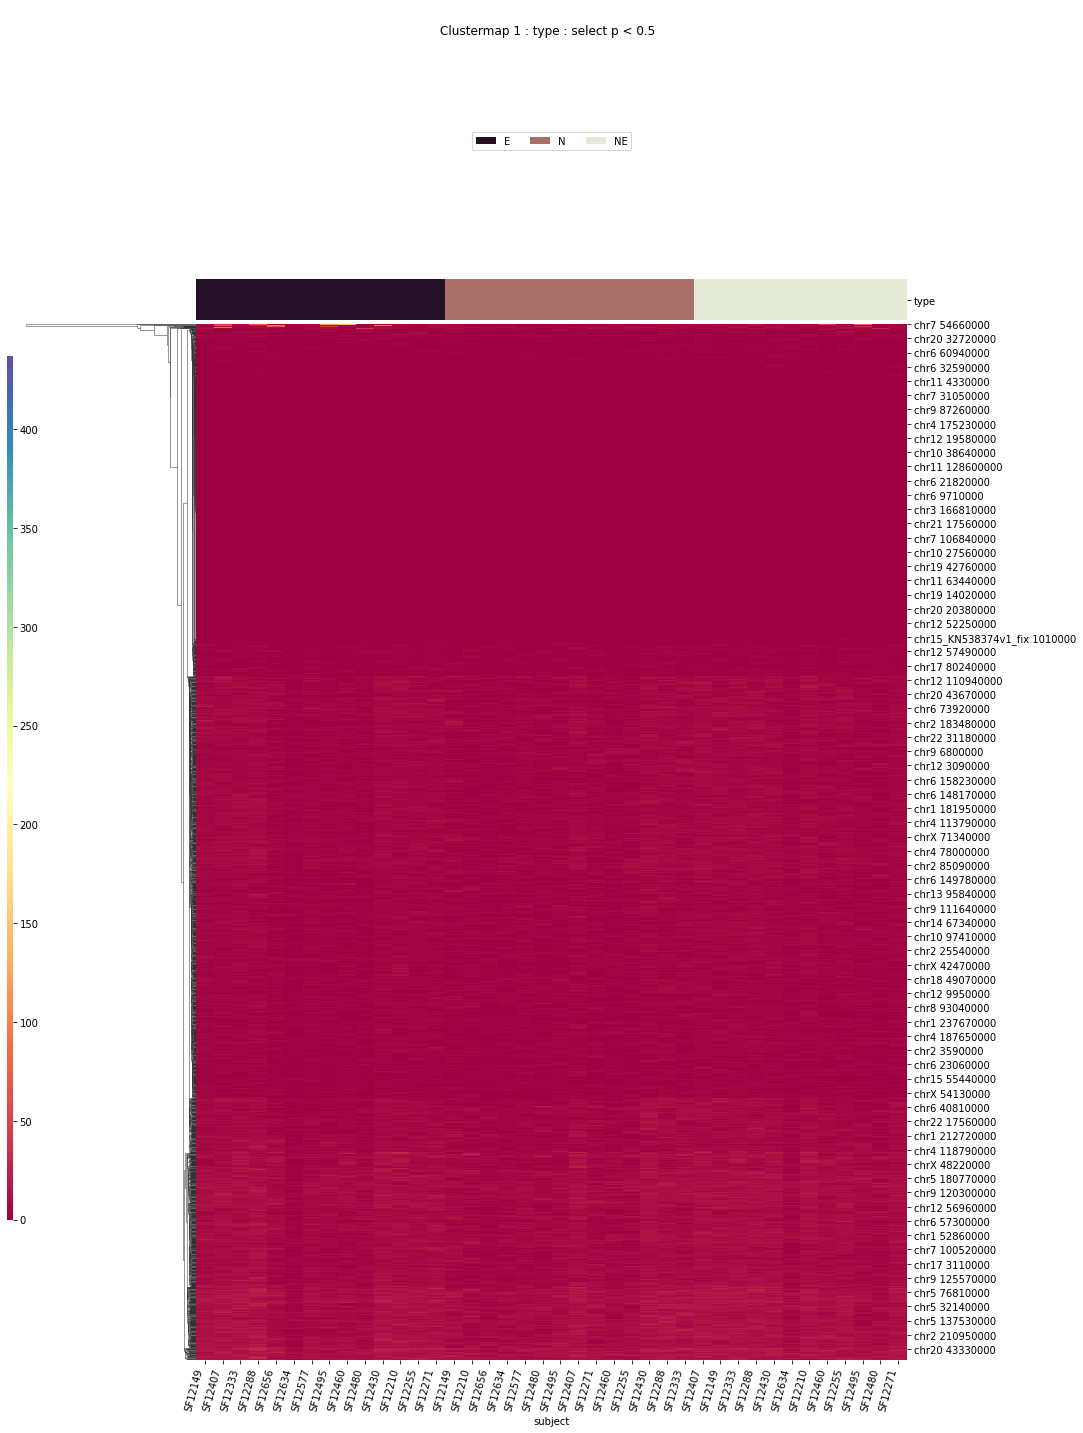

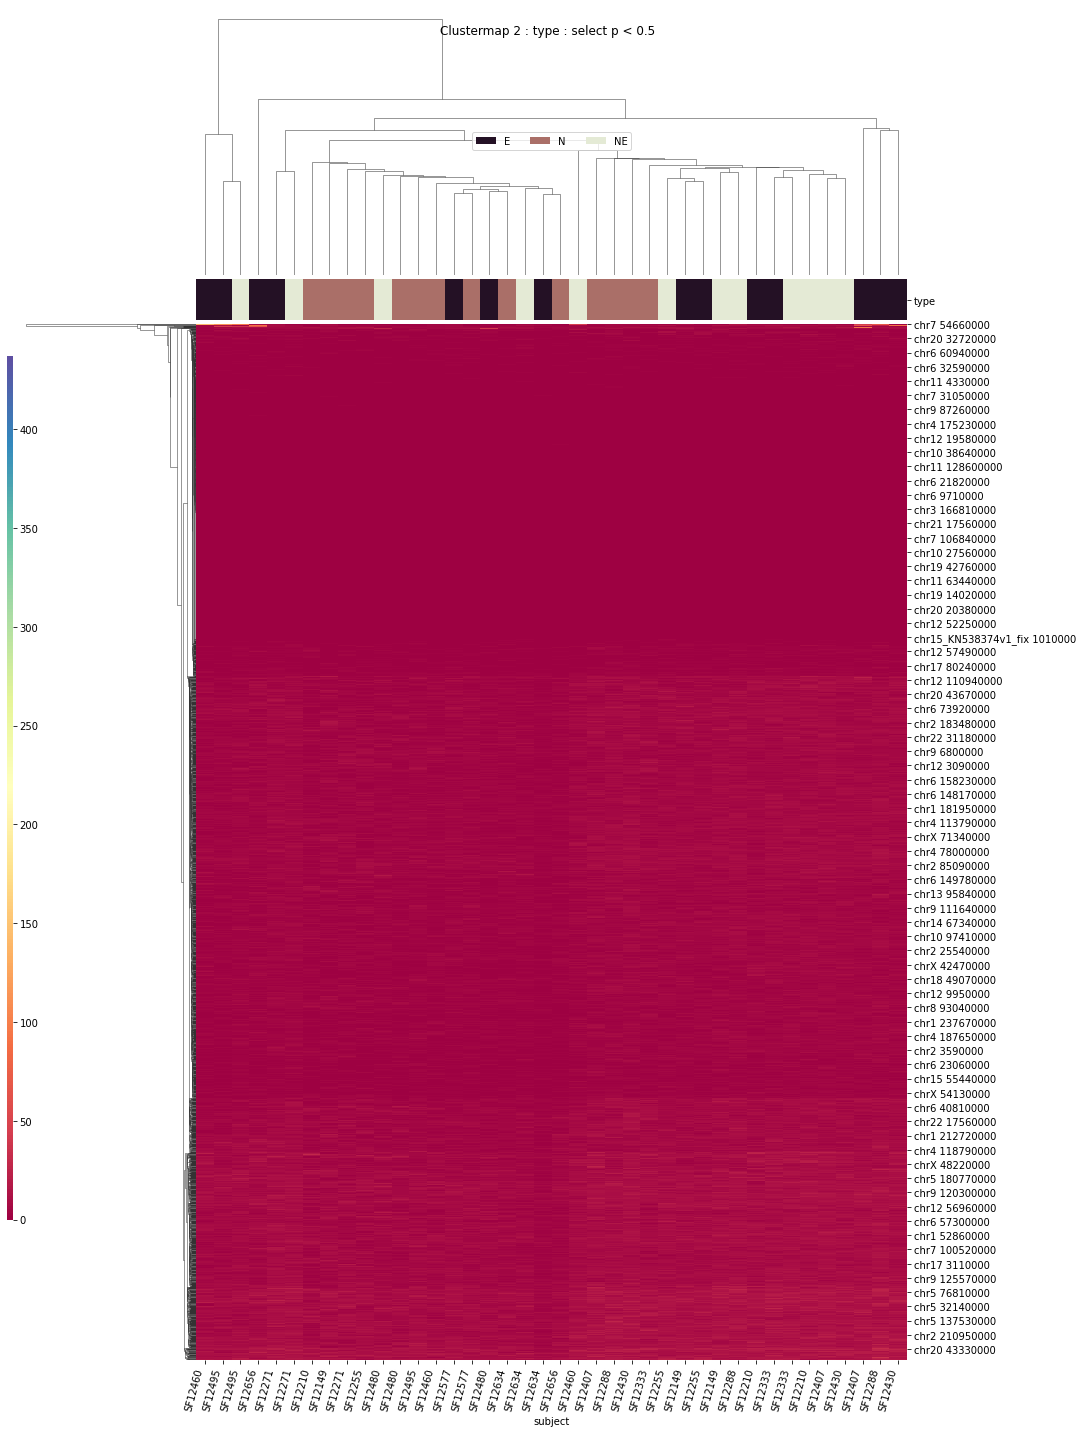

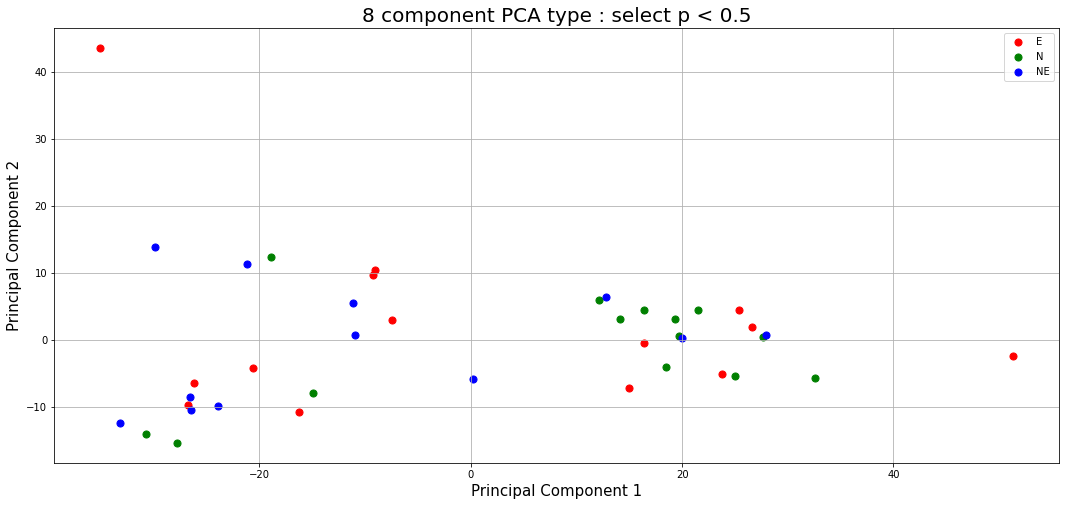

In [52]:
for column in ['type']:
    print(column)
    ttests_boxplots_and_heatmaps(gpmp_df,
        gpmp_df.columns[gpmp_df.columns.str.contains("^chr")],column,box_p=1e-6,heat_p=0.5)
    

In [53]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210614 15:49:29'

type
T-Testing
Boxplotting
Clustermapping
['chr1 112640000' 'chr1 112890000' 'chr1 11300000' 'chr1 114050000'
 'chr1 114480000' 'chr1 12000000' 'chr1 13320000' 'chr1 13330000'
 'chr1 147230000' 'chr1 147940000' 'chr1 150850000' 'chr1 15130000'
 'chr1 151590000' 'chr1 151600000' 'chr1 152140000' 'chr1 152190000'
 'chr1 156180000' 'chr1 161280000' 'chr1 167030000' 'chr1 168200000'
 'chr1 168830000' 'chr1 172570000' 'chr1 179040000' 'chr1 179410000'
 'chr1 180710000' 'chr1 182010000' 'chr1 202450000' 'chr1 208650000'
 'chr1 21050000' 'chr1 211850000' 'chr1 21380000' 'chr1 21500000'
 'chr1 222480000' 'chr1 226110000' 'chr1 227270000' 'chr1 234260000'
 'chr1 235310000' 'chr1 236370000' 'chr1 237120000' 'chr1 23990000'
 'chr1 247220000' 'chr1 248830000' 'chr1 248910000' 'chr1 31170000'
 'chr1 32970000' 'chr1 33050000' 'chr1 37070000' 'chr1 37890000'
 'chr1 39800000' 'chr1 39860000' 'chr1 39910000' 'chr1 40000000'
 'chr1 40570000' 'chr1 45110000' 'chr1 45220000' 'chr1 45490000'
 'chr1 4572000

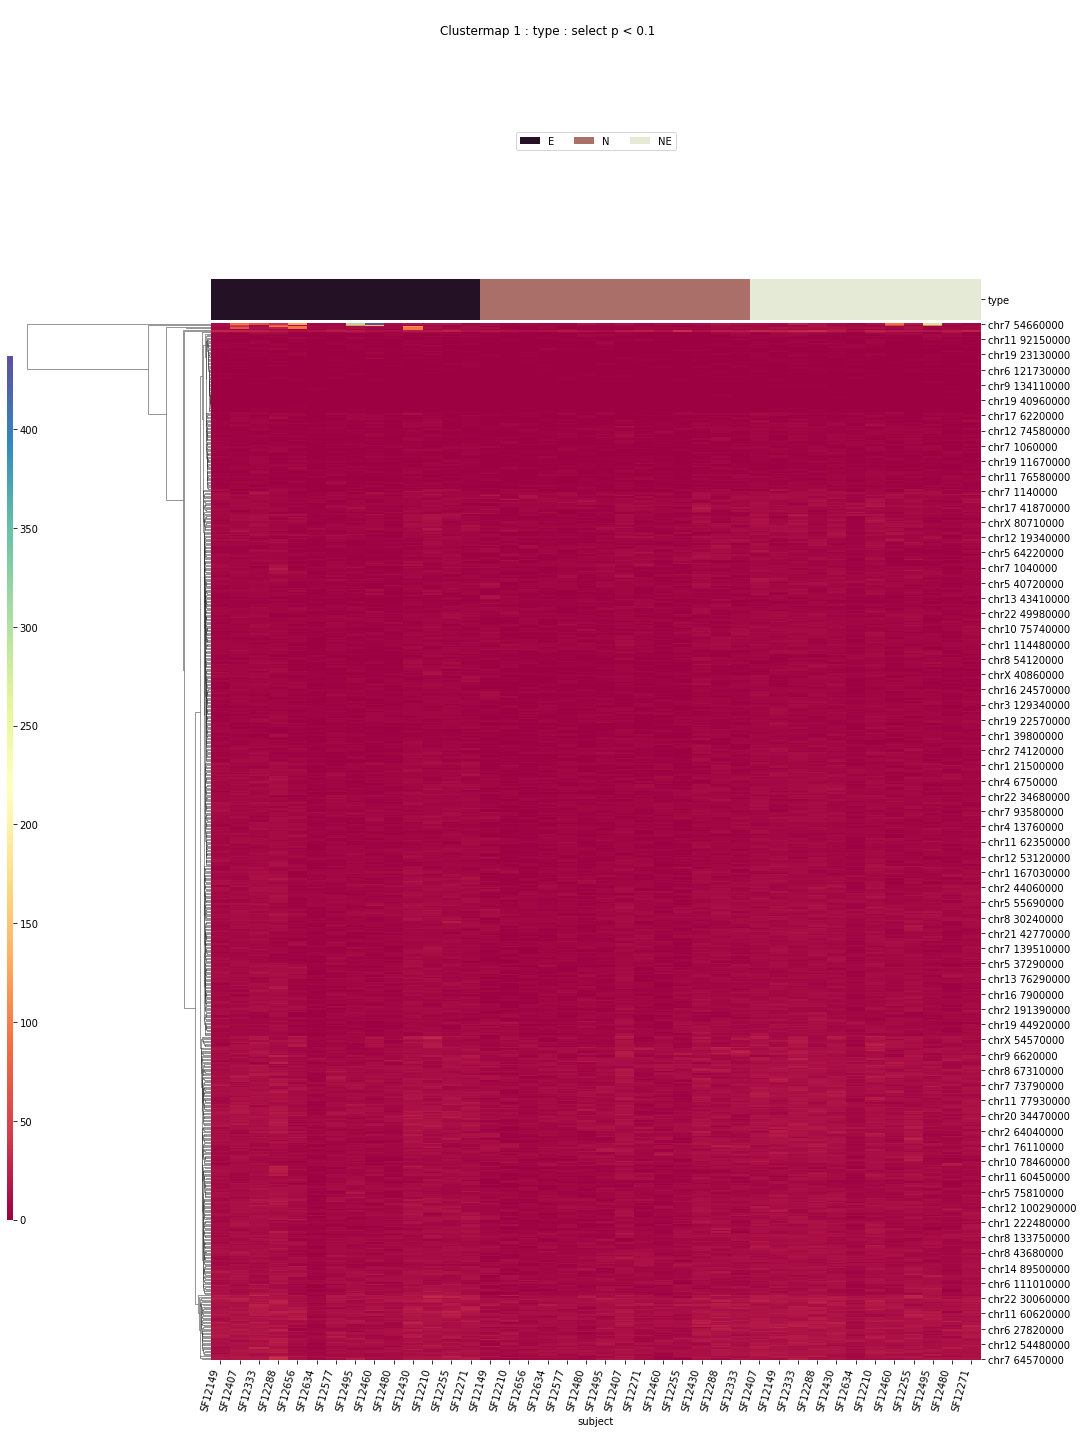

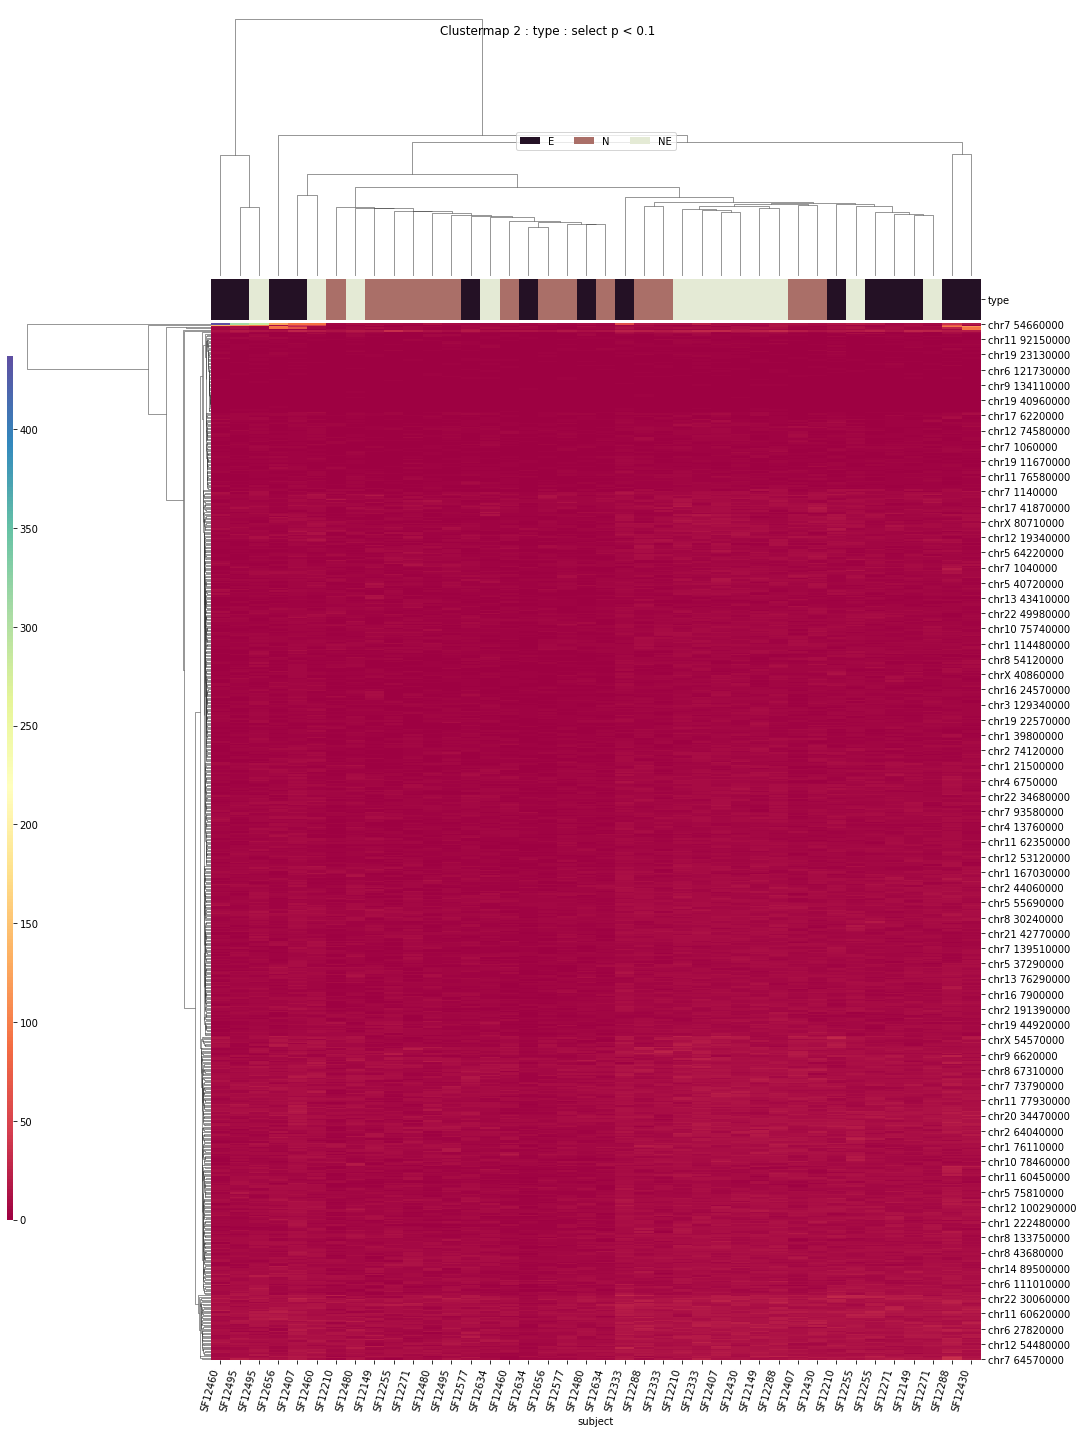

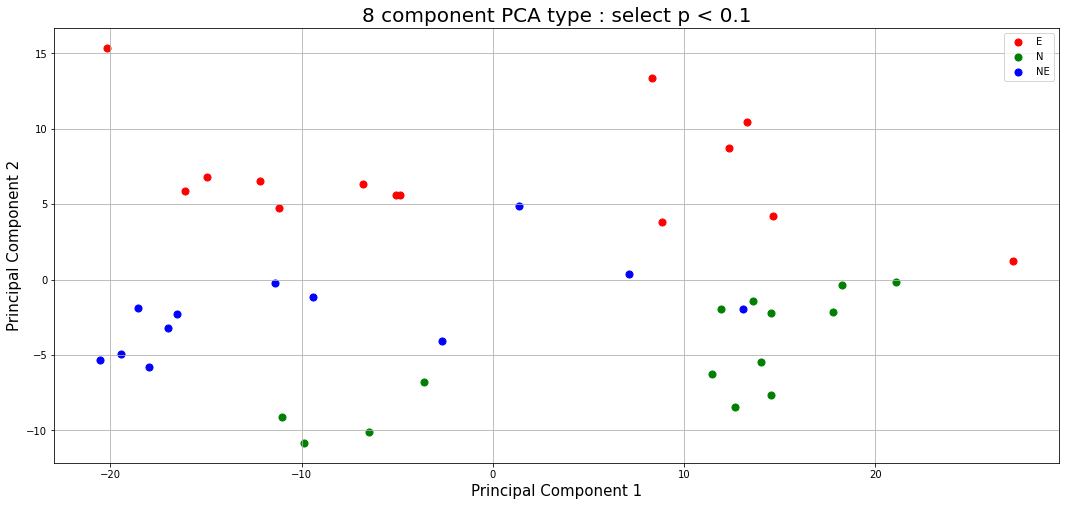

In [54]:
for column in ['type']:
    print(column)
    ttests_boxplots_and_heatmaps(gpmp_df,
        gpmp_df.columns[gpmp_df.columns.str.contains("^chr")],column,box_p=1e-9,heat_p=0.1)
    

In [55]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210614 16:04:17'

type
T-Testing
Boxplotting
Clustermapping
['chr1 114050000' 'chr1 211850000' 'chr1 234260000' 'chr1 235310000'
 'chr1 37070000' 'chr1 39860000' 'chr1 45220000' 'chr1 45760000'
 'chr1 96460000' 'chr1 98510000' 'chr1 99850000' 'chr10 110760000'
 'chr10 119260000' 'chr10 130620000' 'chr10 99890000' 'chr11 37430000'
 'chr11 61940000' 'chr11 70450000' 'chr11 76580000' 'chr11 79800000'
 'chr11 8520000' 'chr11 86730000' 'chr12 104320000' 'chr12 28200000'
 'chr12 53120000' 'chr12 56790000' 'chr12 7590000' 'chr12 75940000'
 'chr12 90410000' 'chr13 31990000' 'chr14 31550000' 'chr14 67340000'
 'chr14 76820000' 'chr15 46090000' 'chr15 49540000' 'chr15 62210000'
 'chr15 65730000' 'chr15 92760000' 'chr16 25220000' 'chr16 48480000'
 'chr16 70220000' 'chr16 7900000' 'chr16 9160000' 'chr17 21590000'
 'chr17 2440000' 'chr17 28650000' 'chr17 30970000' 'chr17 64870000'
 'chr18 10500000' 'chr18 49570000' 'chr19 11670000' 'chr19 22570000'
 'chr19 52720000' 'chr2 127780000' 'chr2 138870000' 'chr2 202430000'


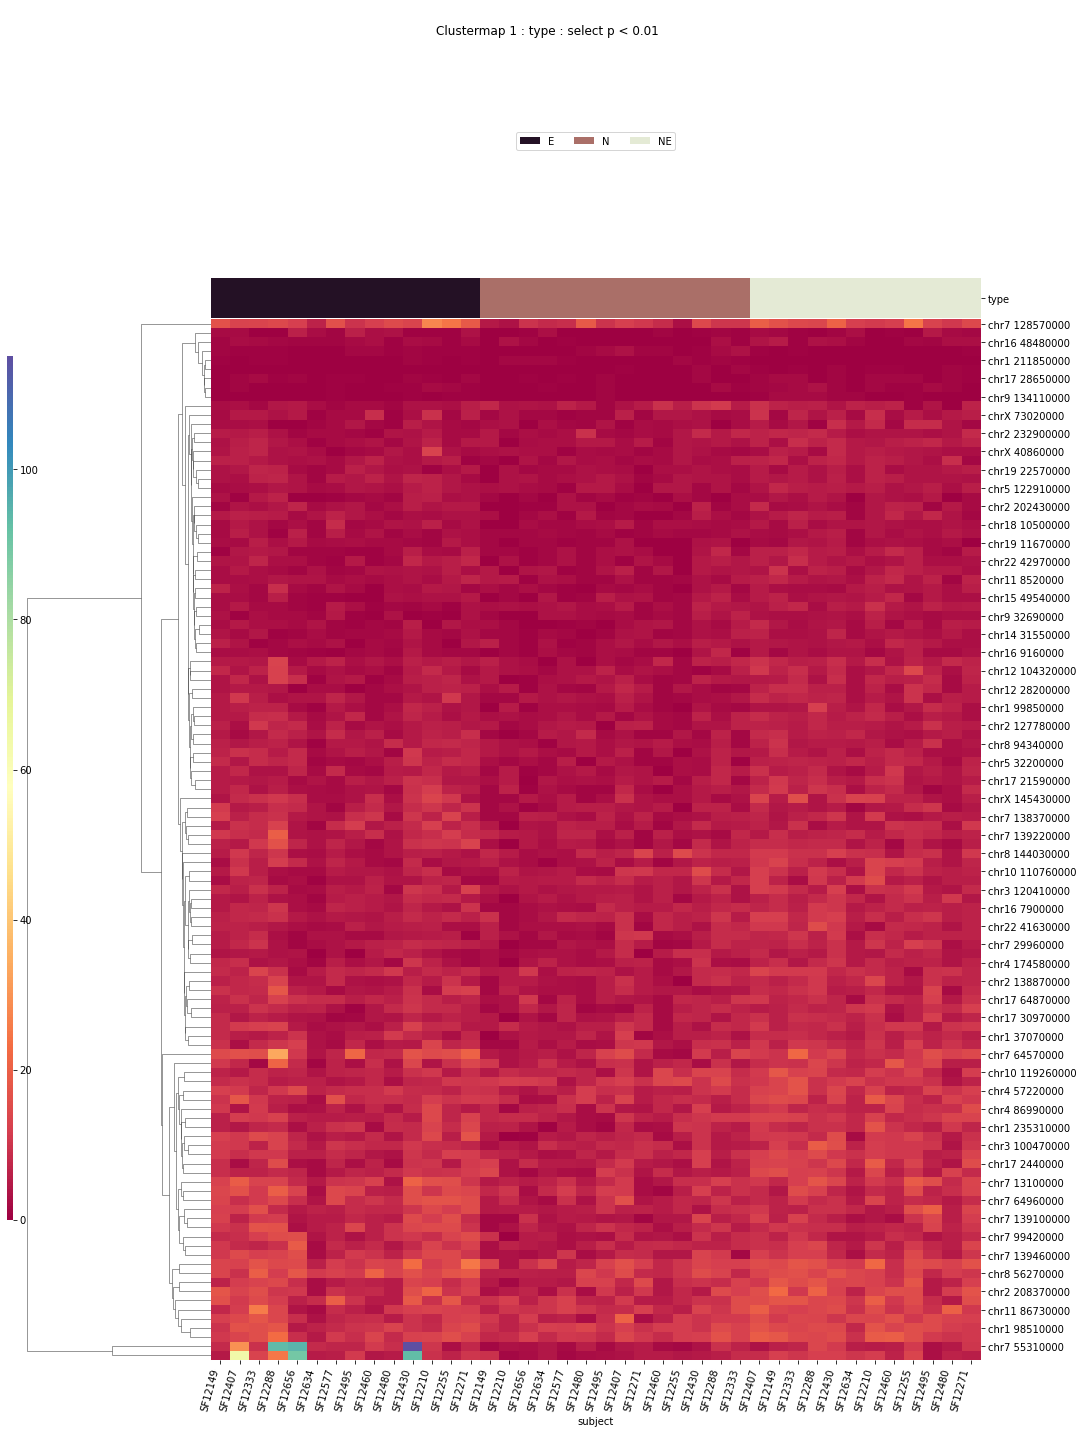

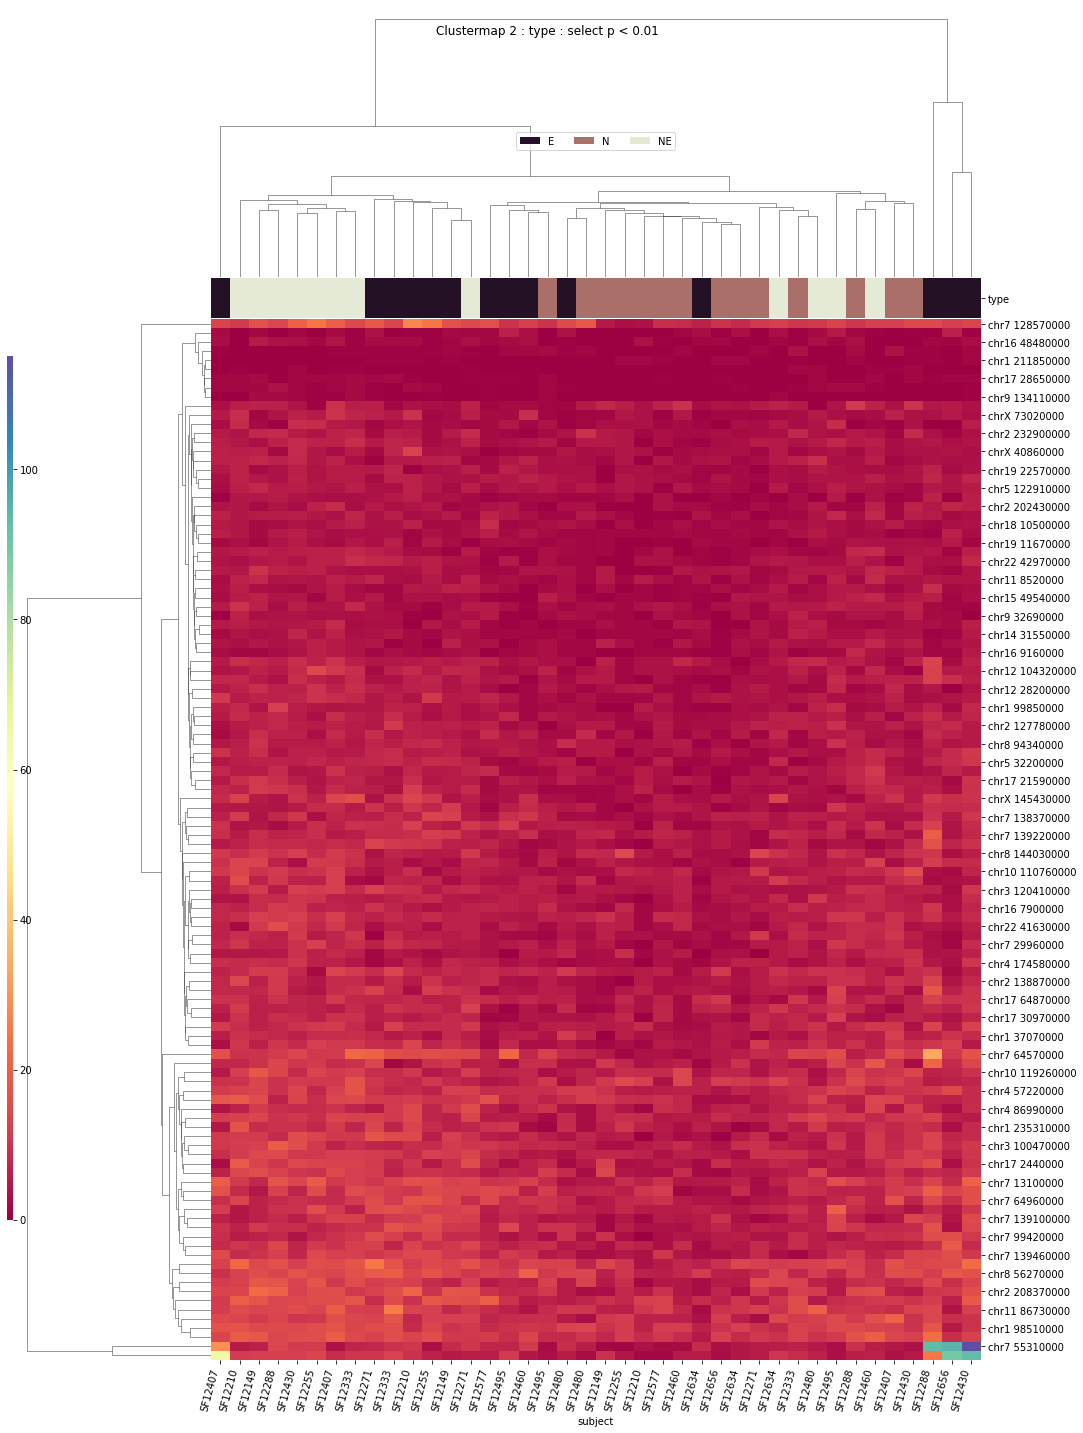

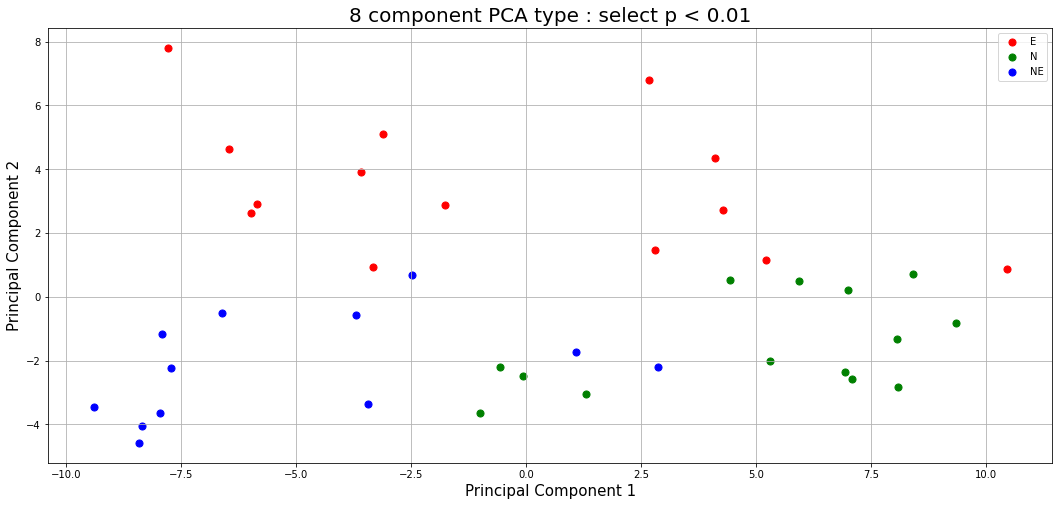

In [56]:
for column in ['type']:
    print(column)
    ttests_boxplots_and_heatmaps(gpmp_df,
        gpmp_df.columns[gpmp_df.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.01)
    

In [57]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210614 16:17:30'

type
T-Testing
Boxplotting
Clustermapping
['chr10 99890000' 'chr12 56790000' 'chr12 90410000' 'chr13 31990000'
 'chr14 67340000' 'chr16 70220000' 'chr2 208370000' 'chr3 129340000'
 'chr3 77160000' 'chr5 122910000' 'chr5 139220000' 'chr5 32200000'
 'chr6 158340000' 'chr7 139460000' 'chr7 55400000' 'chr8 56270000'
 'subject' 'type']


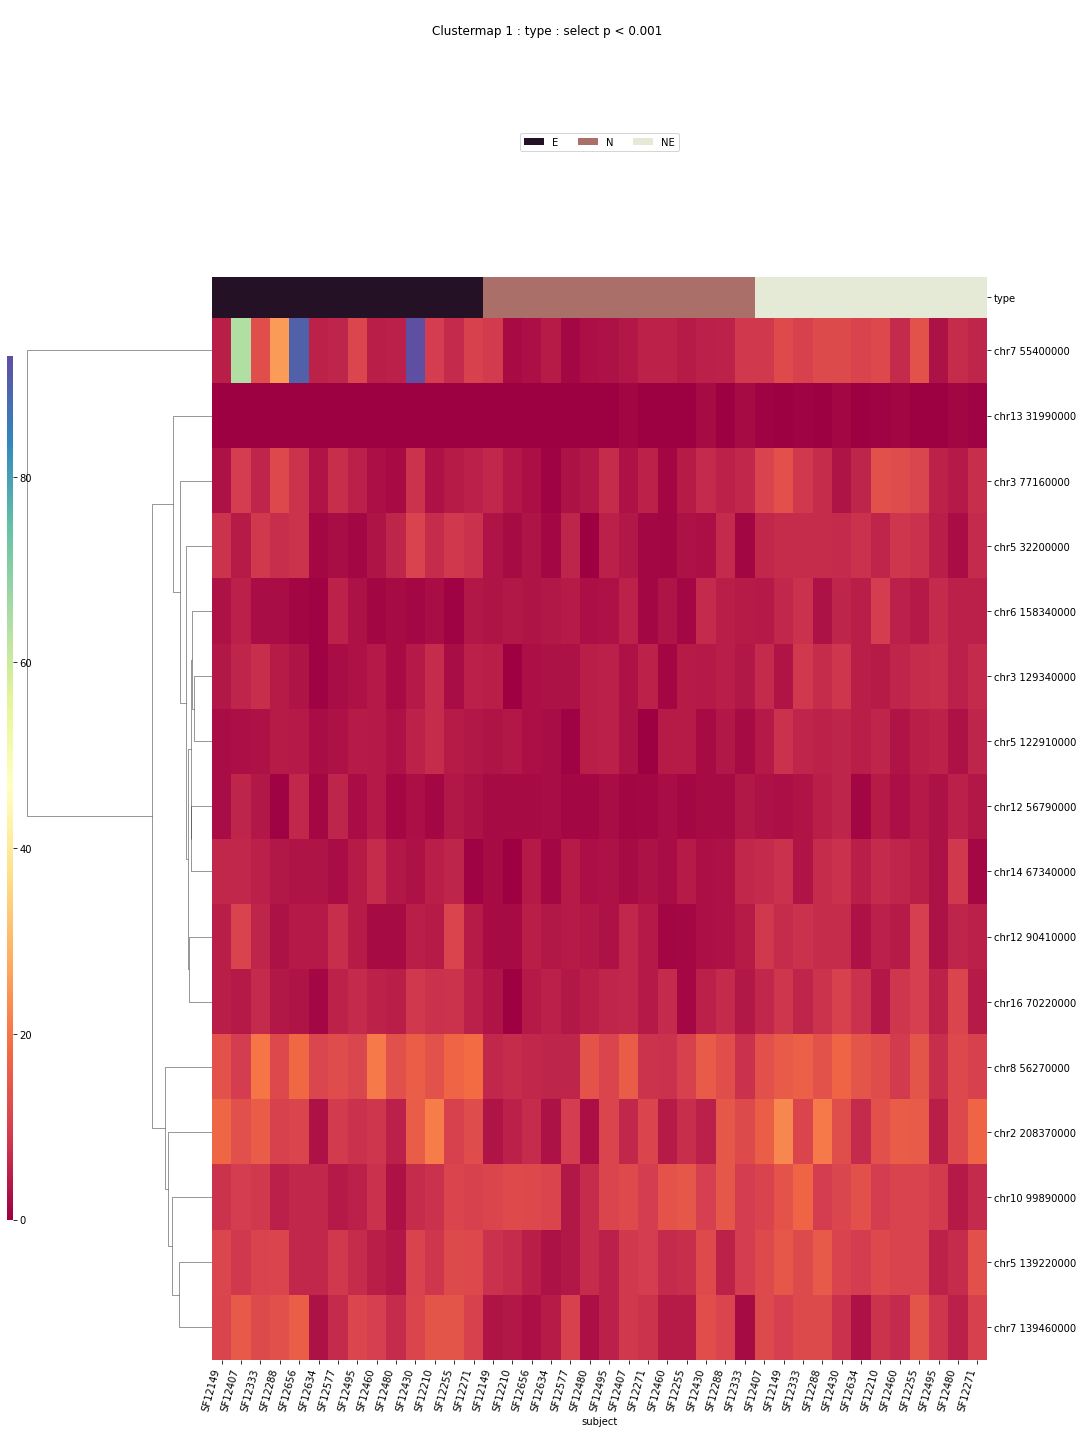

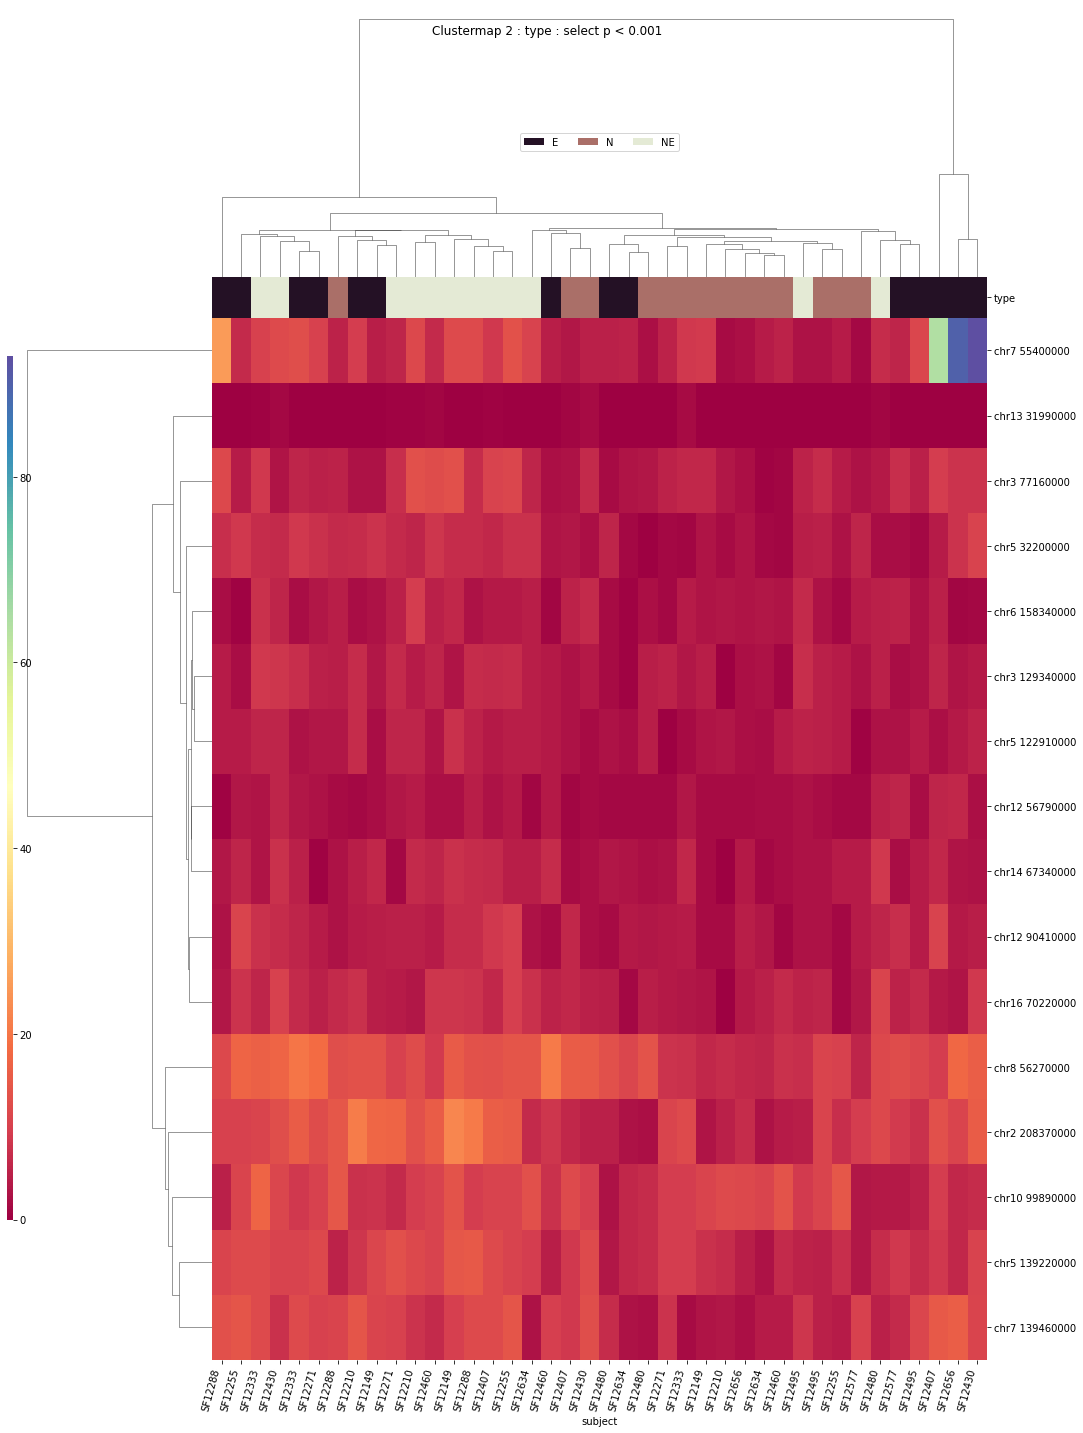

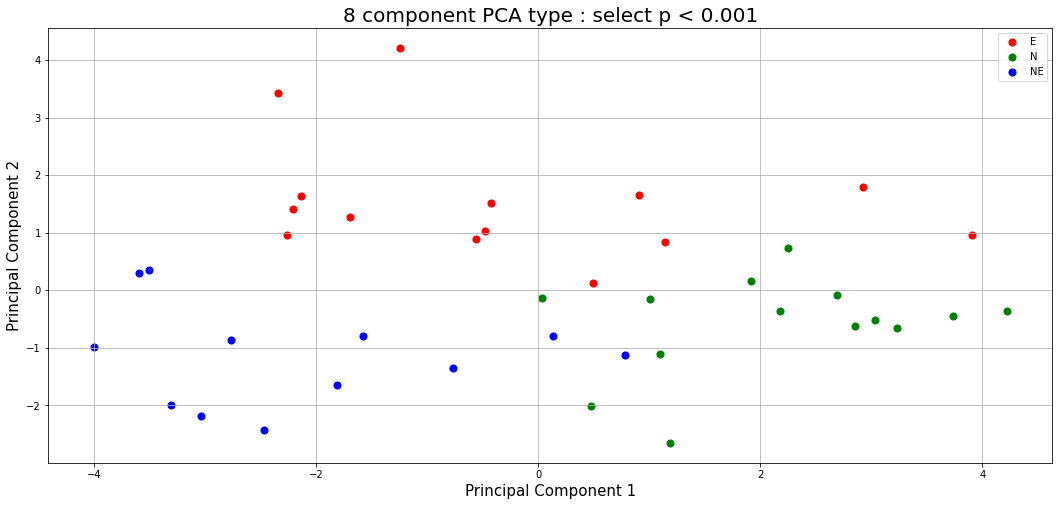

In [58]:
for column in ['type']:
    print(column)
    ttests_boxplots_and_heatmaps(gpmp_df,
        gpmp_df.columns[gpmp_df.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.001)
    

In [59]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210614 16:31:22'

---

In [60]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [61]:
pd.set_option('display.max_columns', default_max_columns)

In [62]:
pd.set_option('display.max_rows',default_max_rows)

In [63]:
pd.set_option('display.precision', default_precision)